# Imports

In [1]:
import pandas as pd
import tifffile as tif
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

# Function Definitions

In [2]:
def stitch_images_iteratively(images):
    stitched_images=[]
    for i in np.arange(0,len(images)-1,2):
        stitcher = cv2.Stitcher_create()
        (status, stitched) = stitcher.stitch(images[i],images[i+1])
        if status:
            stitched_images.append(stitched)
            print(i)
        else:
            print("{} failed",i)
    if len(images)%2:
        stitched_images.append(images[-1])
    return stitched_images

# Load data

building off of https://www.pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/ 

In [3]:
fld = '/Users/emilydennis/Desktop/20210612/'
thermal_images=[]
images=[]
images_names=[]
thermal_images_names=[]
for file in sorted(os.listdir(fld)):
    if 'fullphoto.JPG' in file:
        print(file)
        im = cv2.imread(os.path.join(fld,file))
        images.append(im)
        images_names.append(file)
        #if 'photo' in file:
        #    images.append(im)
        #    images_names.append(file)
        #else:
        #    thermal_images.append(im)
        #    thermal_images_names.append(file)

06122021_511-fullphoto.JPG
06122021_512-fullphoto.JPG
06122021_514-fullphoto.JPG
06122021_515-fullphoto.JPG
06122021_516-fullphoto.JPG
06122021_517-fullphoto.JPG
06122021_518-fullphoto.JPG
06122021_519-fullphoto.JPG
06122021_520-fullphoto.JPG
06122021_521-fullphoto.JPG
06122021_522-fullphoto.JPG
06122021_523-fullphoto.JPG
06122021_524-fullphoto.JPG
06122021_525-fullphoto.JPG
06122021_526-fullphoto.JPG
06122021_527-fullphoto.JPG
06122021_528-fullphoto.JPG
06122021_529-fullphoto.JPG
06122021_530-fullphoto.JPG
06122021_531-fullphoto.JPG
06122021_532-fullphoto.JPG
06122021_533-fullphoto.JPG
06122021_534-fullphoto.JPG
06122021_535-fullphoto.JPG
06122021_536-fullphoto.JPG
06122021_537-fullphoto.JPG
06122021_538-fullphoto.JPG
06122021_539-fullphoto.JPG
06122021_540-fullphoto.JPG
06122021_541-fullphoto.JPG
06122021_542-fullphoto.JPG
06122021_543-fullphoto.JPG
06122021_544-fullphoto.JPG
06122021_545-fullphoto.JPG
06122021_546-fullphoto.JPG
06122021_547-fullphoto.JPG
06122021_548-fullphoto.JPG
0

In [24]:
thermal_images_names[2:]

['06122021_511.JPG',
 '06122021_512.JPG',
 '06122021_513.JPG',
 '06122021_514.JPG',
 '06122021_515.JPG',
 '06122021_516.JPG',
 '06122021_517.JPG',
 '06122021_518.JPG',
 '06122021_519.JPG',
 '06122021_520.JPG',
 '06122021_521.JPG',
 '06122021_522.JPG',
 '06122021_523.JPG',
 '06122021_524.JPG',
 '06122021_525.JPG',
 '06122021_526.JPG',
 '06122021_527.JPG',
 '06122021_528.JPG',
 '06122021_529.JPG',
 '06122021_530.JPG',
 '06122021_531.JPG',
 '06122021_532.JPG',
 '06122021_533.JPG',
 '06122021_534.JPG',
 '06122021_535.JPG',
 '06122021_536.JPG',
 '06122021_537.JPG',
 '06122021_538.JPG',
 '06122021_539.JPG',
 '06122021_540.JPG',
 '06122021_541.JPG',
 '06122021_542.JPG',
 '06122021_543.JPG',
 '06122021_544.JPG',
 '06122021_545.JPG',
 '06122021_546.JPG',
 '06122021_547.JPG',
 '06122021_548.JPG',
 '06122021_549.JPG',
 '06122021_550.JPG',
 '06122021_551.JPG',
 '06122021_552.JPG',
 '06122021_553.JPG',
 '06122021_554.JPG',
 '06122021_555.JPG',
 '06122021_556.JPG',
 '06122021_557.JPG',
 '06122021_55

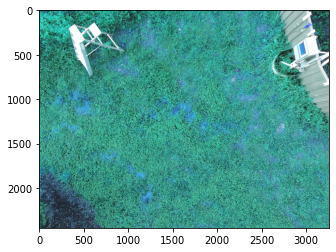

In [18]:
val=0
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images[val:val+3],)
image0 = np.squeeze(images[val])
image1 = np.squeeze(images[val+1])
image2 = np.squeeze(images[val+2])

plt.imshow(image0)

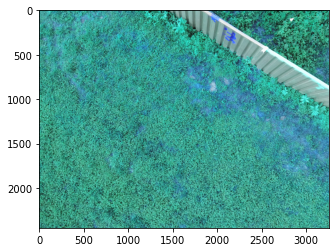

In [19]:
plt.imshow(image1)

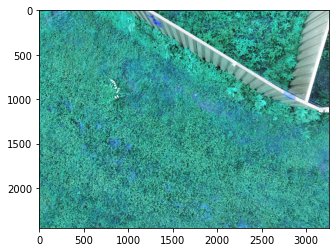

In [20]:
plt.imshow(image2)

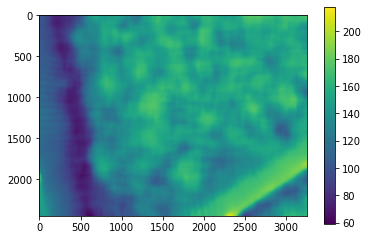

In [8]:
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray2=cv2.medianBlur(gray,201)
plt.imshow(newgray)
plt.colorbar()

In [9]:
descriptor2 = cv2.Canny(newgray,0,.2)
#(kps, features) = descriptor.detectAndCompute(gray, None)
plt.imshow(descriptor2,cmap='bone')
plt.colorbar()

NameError: name 'newgray' is not defined

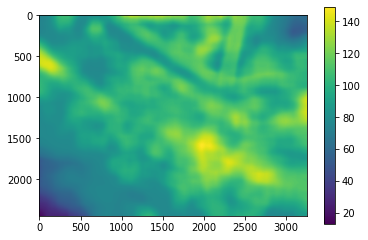

In [145]:
gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
gray3=cv2.medianBlur(gray,201)
plt.imshow(newgray)
plt.colorbar()

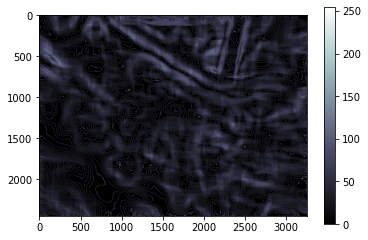

In [89]:

descriptor3 = cv2.Canny(newgray,0,.2)
#(kps, features) = descriptor.detectAndCompute(gray, None)
plt.imshow(descriptor3,cmap='bone')
plt.colorbar()

In [93]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([descriptor2,descriptor3])
status

1

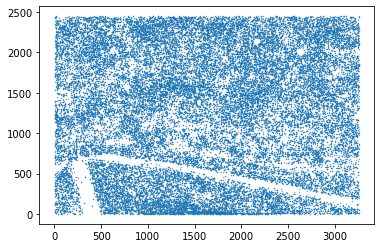

In [20]:
plt.scatter(kps2[:,0],kps2[:,1],0.1)

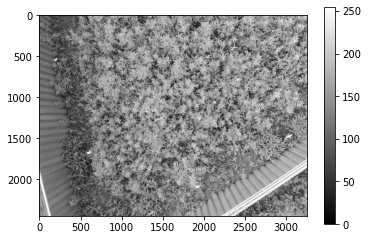

In [10]:
plt.imshow(gray,cmap='gray')
plt.colorbar()

In [11]:
final_stitched_image=images
progress_stitch = []
while len(final_stitched_image)!=1:
    print("length is {}... now stitching".format(len(final_stitched_image)))
    final_stitched_image = stitch_images_iteratively(final_stitched_image)
    progress_stitch.append(final_stitched_image)

length is 54... now stitching
0
2
4
6
8
10


KeyboardInterrupt: 

In [ ]:
final_stitched_image=images
final_stitched_image = stitch_images_iteratively(final_stitched_image)
progress_stitch.append(final_stitched_image)

In [30]:
stitched_images=[]
for i in np.arange(0,4,2):
    stitcher = cv2.Stitcher_create()
    (status, stitched) = stitcher.stitch(images[i],images[i-1])
    stitched_images.append(stitched)

0
2


In [54]:
i=8
(status, stitched)=stitcher.stitch(images[i],images[i-1])

1

In [136]:
?stitcher.stitch

Docstring:
stitch(images[, pano]) -> retval, pano
.   @overload



stitch(images, masks[, pano]) -> retval, pano
.   @brief These functions try to stitch the given images.
.   
.       @param images Input images.
.       @param masks Masks for each input image specifying where to look for keypoints (optional).
.       @param pano Final pano.
.       @return Status code.
Type:      builtin_function_or_method


In [141]:
i=1
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images[i],images[i+1])
print(status)
np.shape(stitched)

1


(2448, 3264, 3)

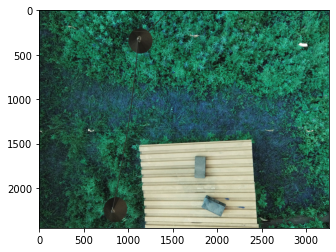

In [139]:
plt.imshow(stitched)

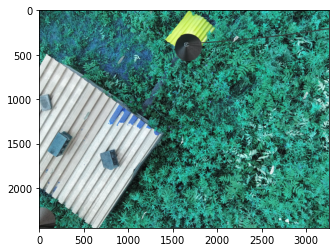

In [130]:
plt.imshow(images[i])

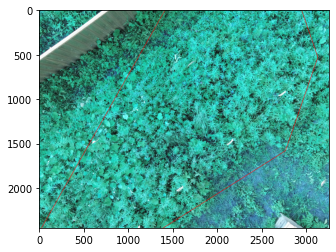

In [131]:
plt.imshow(images[i+1])

In [59]:

MIN_MATCH_COUNT = 10
img1 = image1
img2 = image2

In [72]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image0,None)
kp2, des2 = sift.detectAndCompute(image1,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

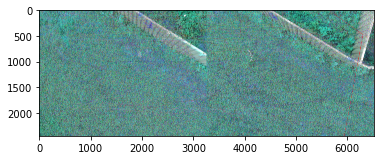

In [62]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,img2)
plt.imshow(img3)
plt.show()

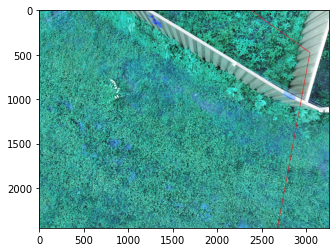

In [67]:
plt.imshow(img2)
plt.show()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]